In [35]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv(r'D:\Datasets\bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [37]:
data.shape

(1372, 5)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


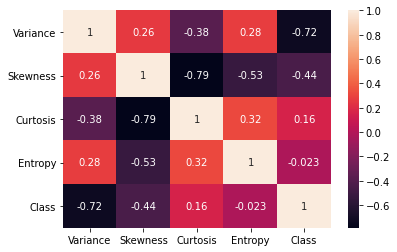

In [39]:
sbn.heatmap(data.corr(),annot=True)
plt.show()

In [40]:
data['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [41]:
x = data.drop('Class',axis=1)
y = data['Class']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=data.columns[0:4])
x.head()

,Variance,Skewness,Curtosis,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [44]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [45]:
y_pred = sv.predict(x_test)

In [46]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

1.0
[[219   0]
 [  0 193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       193

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

